In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=30, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=14, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-03 22:25:19.807721: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-bcbdf8e7-c299-45fa-9d42-aa17b33aa3f8.json


table  o_pose :  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
ben_cube0  o_pose :  [[-0.99833062  0.05775794  0.         -0.34006171]
 [-0.05775794 -0.99833062  0.          0.59777838]
 [ 0.          0.          1.          0.79229998]
 [ 0.          0.          0.          1.        ]]
bottle0  o_pose :  [[-0.44628384 -0.89489147  0.         -0.21132009]
 [ 0.89489147 -0.44628384  0.          0.49846736]
 [ 0.          0.          1.          0.83215735]
 [ 0.          0.          0.          1.        ]]
can0  o_pose :  [[-0.98551936 -0.16956296  0.         -0.26125986]
 [ 0.16956296 -0.98551936  0.          0.87988355]
 [ 0.          0.          1.          0.80759666]
 [ 0.          0.          0.          1.        ]]
cereal0  o_pose :  [[-0.67457655  0.7382049   0.         -0.47868132]
 [-0.7382049  -0.67457655  0.          0.41233326]
 [ 0.          0.          1.          0.84226188]
 [ 0.          0.          0.          1.        ]]
table  o_pose :  [[1. 0. 0.

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]), 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]), 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188])}
{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.47189415 -0.22862241  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.40412951 -0.10179989  0.87515735]), 'can0': Object(name=can0, pos=[ 0.6645213  -0.10141758  0.85059666]), 'cereal0': Object(name=cereal0, pos=[0.42014769 0.00883087 0.88526188])}


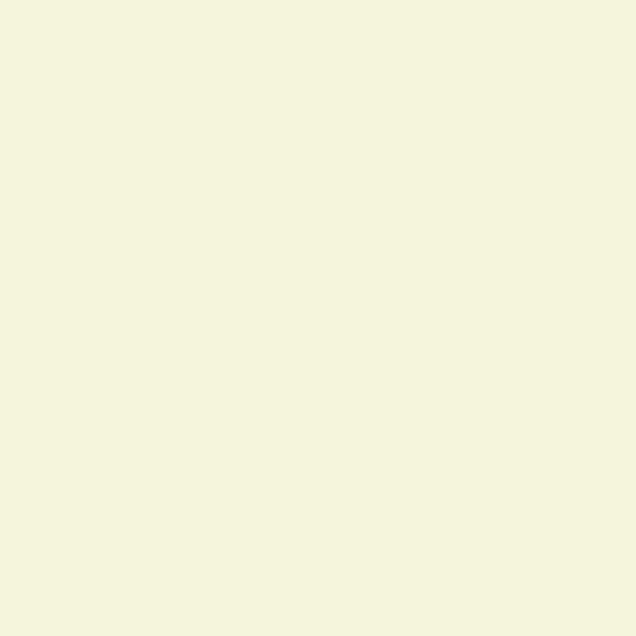

In [2]:
# #######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

In [3]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
        use_pick_action=False,
        consider_next_scene=True, 
    )
mcts.only_optimize_1 = False

2023-08-03 22:25:41.211721: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-03 22:25:41.237974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-03 22:25:41.238044: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-03 22:25:41.238065: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-03 22:25:41.239446: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-03 22:25:41.239495: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-03 22:25:43.394775: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 22:25:43.395788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-03 22:25:43.395864: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-03 22:25:43.395903: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-03 22:25:43.661805: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-03 22:25:43.661826: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-03 22:25:43.661829: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-03 22:25:43.661950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-03 22:25:43.662039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-03 22:25:43.662089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [4]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 1 ===========
[Action] Rearr bottle0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(8) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(8) -> A(11) -> S'(15) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(15) -> A(20) -> S'(22) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(22) -> A(24) -> S'(29) Reward : 2.0
[Action] Rearr cereal0
Good Action
[Reward] S(29) -> A(34) -> S'(35) Reward : 1.667
[Action] Rearr can0
placed another place not goal
[Reward] S(35) -> A(39) -> S'(41) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(41) -> A(45) -> S'(46) Reward : -2.857
[Action] Rearr can0
Good Action
[Reward] S(46) -> A(51) -> S'(52) Reward : 1.111
[Action] Rearr bottle0
placed another place not goal
[Reward] S(52) -> A(54) -> S'(57) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(57) -> A(58) -> S'(62) Reward : 

2023-08-03 22:25:46.069701: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-03 22:25:46.412585: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-03 22:25:46.944027: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-03 22:25:47.231601: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 2 grasps for object ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0047 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

bottle0
Extracted Region Cube Size:  0.4
Generated 88 grasps for object bottle0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0058 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0030 sec

cereal0
Extracted Region Cube Size:  0.4
Generated 36 grasps for object cereal0
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0085 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

can0
Extracted Region Cube Size:  0.4
Generated 31 grasps for object can0
solve with LM1
Iterators : 13
WorkingTime[inverse_kinemati

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 107 grasps for object cereal0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0045 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

level 1_5 :  [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
pick ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0044 sec

rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.958
WorkingTime[run]: 3.4433 sec

WorkingTime[run]: 0.0504 sec

WorkingTime[run]: 0.0500 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.053
WorkingTime[run]: 4.6372 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0067 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.577
WorkingTime[run]: 4.3279 sec

WorkingTime[run]: 0.0505 sec

WorkingTime[run]: 0.0505 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.603
WorkingTime[run]: 3.2625 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0062 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.558
WorkingTime[run]: 3.4059 sec

WorkingTime[run]: 0.0492 sec

WorkingTime[run]: 0.0509 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.428
WorkingTime[run]: 4.5440 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0062 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0072 sec

solve with LM1
Iterators : 24
WorkingTime[inverse_kinematics]: 0.0109 sec

solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0119 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0101 sec

solve with LM1
Iterators : 35
WorkingTime[inverse_kinematics]: 0.0158 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0079 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0096 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0068 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinema

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 10 --> 90
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000004
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.037
WorkingTime[run]: 4.4080 sec

WorkingTime[run]: 0.0525 sec

WorkingTime[run]: 0.0519 sec

rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 4.142
WorkingTime[run]: 3.3243 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0092 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0062 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0079 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0052 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0058 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0066 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0052 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0043 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0074 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.543
WorkingTime[run]: 8.0869 sec

WorkingTime[run]: 0.0505 sec

WorkingTime[run]: 0.0471 sec

rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.607
WorkingTime[run]: 4.5936 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0074 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0066 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0105 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0105 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0053 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0086 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0096 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0082 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0095 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0064 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0110 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0095 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0059 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0068 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0051 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0098 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 18 --> 170
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.963
WorkingTime[run]: 10.7097 sec

WorkingTime[run]: 0.0512 sec

WorkingTime[run]: 0.0509 sec

rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 4.988
WorkingTime[run]: 3.2203 sec

Success pnp
pick can0
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0098 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.023
WorkingTime[run]: 3.4067 sec

WorkingTime[run]: 0.0506 sec

WorkingTime[run]: 0.0490 sec

rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 3.139
WorkingTime[run]: 4.6722 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0046 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.019
WorkingTime[run]: 4.4054 sec

WorkingTime[run]: 0.0476 sec

WorkingTime[run]: 0.0545 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.959
WorkingTime[run]: 3.3001 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0086 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.982
WorkingTime[run]: 3.3953 sec

WorkingTime[run]: 0.0496 sec

WorkingTime[run]: 0.0506 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.941
WorkingTime[run]: 4.5897 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0048 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.861
WorkingTime[run]: 4.2874 sec

WorkingTime[run]: 0.0502 sec

WorkingTime[run]: 0.0475 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.98
WorkingTime[run]: 3.2779 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0038 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.381
WorkingTime[run]: 3.4325 sec

WorkingTime[run]: 0.0485 sec

WorkingTime[run]: 0.0492 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 1.391
WorkingTime[run]: 4.4752 sec

solve with LM1
Iterators : 31
WorkingTime[inverse_kinematics]: 0.0181 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000016
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.794
WorkingTime[run]: 4.3017 sec

WorkingTime[run]: 0.0511 sec

WorkingTime[run]: 0.0507 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.839
WorkingTime[run]: 3.3685 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0075 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.346
WorkingTime[run]: 3.3328 sec

WorkingTime[run]: 0.0487 sec

WorkingTime[run]: 0.0506 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000030


Cost is 2.535
WorkingTime[run]: 4.6963 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0066 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 12 --> 110
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.871
WorkingTime[run]: 4.4176 sec

WorkingTime[run]: 0.0520 sec

WorkingTime[run]: 0.0632 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 2.979
WorkingTime[run]: 3.3227 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0045 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.795
WorkingTime[run]: 3.2884 sec

WorkingTime[run]: 0.0513 sec

WorkingTime[run]: 0.0510 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 1.783
WorkingTime[run]: 4.5854 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0045 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.245
WorkingTime[run]: 4.2932 sec

WorkingTime[run]: 0.0507 sec

WorkingTime[run]: 0.0510 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10


Cost is 1.259
WorkingTime[run]: 3.2434 sec

Success pnp
Update Sub optimal Nodes!! Value is 8.256744.
 level 2 value : 8.256744 
Add level_1_node!
Add level_2_node!
########### Running time :  144.10692882537842 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 3 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(123) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(123) -> A(126) -> S'(129) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(129) -> A(130) -> S'(135) Reward : -6.667
[Action] Rearr bottle0
Good Action
[Reward] S(135) -> A(137) -> S'(141) Reward : 2.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(141) -> A(146) -> S'(148) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(148) -> A(151) -> S'(153) Reward : -3.333
[Action] Rearr can0
Good Action
[Reward] S(153) -> A(157) -> S'(159) Reward : 1.25
[Action] Rearr cereal0
placed another plac

[Action] Rearr bottle0
Bad Action
[Reward] S(284) -> A(287) -> S'(289) Reward : -5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(289) -> A(290) -> S'(295) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(295) -> A(300) -> S'(301) Reward : 1.429
[Action] Rearr can0
Bad Action
[Reward] S(301) -> A(306) -> S'(307) Reward : -2.857
[Action] Rearr ben_cube0
Good Action
[Reward] S(307) -> A(309) -> S'(313) Reward : 1.111
[Action] Rearr bottle0
Good Action
[Reward] S(313) -> A(315) -> S'(319) Reward : 1.0
[Action] Rearr cereal0
Bad Action
[Reward] S(319) -> A(323) -> S'(324) Reward : -2.0
[Action] Rearr bottle0
Bad Action
[Reward] S(324) -> A(326) -> S'(329) Reward : -1.818
[Action] Rearr cereal0
placed another place not goal
[Reward] S(329) -> A(333) -> S'(335) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(335) -> A(340) -> S'(341) Reward : 0.714
[Action] Rearr cereal0
placed another place not goal
[Reward] S(341) -> A(345) -> S'(347) Reward : -1
Exceed

[Action] Rearr can0
Good Action
[Reward] S(590) -> A(593) -> S'(596) Reward : 1.667
[Action] Rearr cereal0
placed another place not goal
[Reward] S(596) -> A(598) -> S'(600) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(600) -> A(603) -> S'(604) Reward : -2.857
[Action] Rearr cereal0
Good Action
[Reward] S(604) -> A(608) -> S'(609) Reward : 1.111
[Action] Rearr can0
placed another place not goal
[Reward] S(609) -> A(612) -> S'(614) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(614) -> A(615) -> S'(618) Reward : -2.0
[Action] Rearr can0
placed another place not goal
[Reward] S(618) -> A(620) -> S'(623) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(623) -> A(625) -> S'(628) Reward : 0.769
[Action] Rearr can0
Good Action
[Reward] S(628) -> A(631) -> S'(632) Reward : 0.714
##########['bottle0', 'cereal0', 'ben_cube0', 'can0']#############
Success!!!!!
Terminal State! Reward is 5
already has grasp_poses
can0
Extracted Region Cube Size:  0.4
Generated 22 gr

failed to generate grasp pose for ben_cube0
Extracted Region Cube Size:  0.4
Generated 5 grasps for object ben_cube0
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

cereal0
Extracted Region Cube Size:  0.4


[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 55 grasps for object cereal0
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0035 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0016 sec

level 1_5 :  [True, True, True, True, True, True, True, True, True, True]
pick bottle0
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0053 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.54
WorkingTime[run]: 3.3712 sec

WorkingTime[run]: 0.0504 sec

WorkingTime[run]: 0.0501 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.641
WorkingTime[run]: 4.4672 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0111 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000004
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000005
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.409
WorkingTime[run]: 4.3632 sec

WorkingTime[run]: 0.0517 sec

WorkingTime[run]: 0.0514 sec

rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 3.572
WorkingTime[run]: 3.3426 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0047 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.677
WorkingTime[run]: 3.3836 sec

WorkingTime[run]: 0.0500 sec

WorkingTime[run]: 0.0518 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000011


Cost is 1.848
WorkingTime[run]: 4.6626 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0055 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.894
WorkingTime[run]: 4.4075 sec

WorkingTime[run]: 0.0495 sec

WorkingTime[run]: 0.0567 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.901
WorkingTime[run]: 3.3616 sec

Success pnp
pick can0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0071 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.696
WorkingTime[run]: 3.3783 sec

WorkingTime[run]: 0.0511 sec

WorkingTime[run]: 0.0532 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.078
WorkingTime[run]: 4.7263 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0054 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.915
WorkingTime[run]: 4.4168 sec

WorkingTime[run]: 0.0506 sec

WorkingTime[run]: 0.0496 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.343
WorkingTime[run]: 3.2920 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0069 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.94
WorkingTime[run]: 3.3024 sec

WorkingTime[run]: 0.0486 sec

WorkingTime[run]: 0.0512 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 3.04
WorkingTime[run]: 4.6636 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0051 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.196
WorkingTime[run]: 4.5151 sec

WorkingTime[run]: 0.0510 sec

WorkingTime[run]: 0.0503 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.299
WorkingTime[run]: 3.3757 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0039 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.179
WorkingTime[run]: 3.4099 sec

WorkingTime[run]: 0.0501 sec

WorkingTime[run]: 0.0517 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000005


Cost is 1.147
WorkingTime[run]: 4.5533 sec

solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0035 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.1
WorkingTime[run]: 4.4994 sec

WorkingTime[run]: 0.0519 sec

WorkingTime[run]: 0.0510 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10


Cost is 1.132
WorkingTime[run]: 3.2286 sec

Success pnp
Update Sub optimal Nodes!! Value is 14.931767.
 level 2 value : 14.931767 
Add level_1_node!
Add level_2_node!
########### Running time :  241.74207043647766 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 11 ===========
[Action] Rearr bottle0
Good Action
[Reward] S(0) -> A(4) -> S'(205) Reward : 5.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(205) -> A(207) -> S'(650) Reward : 3.333
[Action] Rearr can0
Good Action
[Reward] S(650) -> A(653) -> S'(655) Reward : 2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(655) -> A(656) -> S'(658) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(658) -> A(661) -> S'(662) Reward : -4.0
[Action] Rearr cereal0
Good Action
[Reward] S(662) -> A(666) -> S'(667) Reward : 1.429
[Action] Rearr can0
Good Action
[Reward] S(667) -> A(670) -> S'(671) Reward : 1.25
##########['bottle0', 'ben_cube0', 'cereal0', 'can0']########

[Action] Rearr cereal0
Good Action
[Reward] S(808) -> A(813) -> S'(814) Reward : 2.5
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(814) -> A(815) -> S'(819) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(819) -> A(820) -> S'(823) Reward : -4.0
[Action] Rearr cereal0
Bad Action
[Reward] S(823) -> A(827) -> S'(828) Reward : -3.333
[Action] Rearr ben_cube0
Good Action
[Reward] S(828) -> A(830) -> S'(834) Reward : 1.25
[Action] Rearr bottle0
Good Action
[Reward] S(834) -> A(836) -> S'(840) Reward : 1.111
[Action] Rearr cereal0
placed another place not goal
[Reward] S(840) -> A(843) -> S'(845) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(845) -> A(846) -> S'(848) Reward : -2.0
[Action] Rearr can0
Bad Action
[Reward] S(848) -> A(850) -> S'(852) Reward : -1.818
[Action] Rearr bottle0
placed another place not goal
[Reward] S(852) -> A(854) -> S'(857) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(857) -> A(860) -> S'(862) Reward : 0.714
[Action

[Action] Rearr can0
placed another place not goal
[Reward] S(1081) -> A(1086) -> S'(1088) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(1088) -> A(1092) -> S'(1094) Reward : 1.429
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1094) -> A(1095) -> S'(1100) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(1100) -> A(1104) -> S'(1105) Reward : -2.5
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1105) -> A(1106) -> S'(1111) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1111) -> A(1113) -> S'(1115) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1115) -> A(1117) -> S'(1121) Reward : 0.833
[Action] Rearr can0
Good Action
[Reward] S(1121) -> A(1124) -> S'(1127) Reward : 0.769
[Action] Rearr cereal0
Good Action
[Reward] S(1127) -> A(1130) -> S'(1131) Reward : 0.714
##########['bottle0', 'ben_cube0', 'can0', 'cereal0']#############
Success!!!!!
Terminal State! Reward is 5
already has grasp_poses


[Action] Rearr can0
Good Action
[Reward] S(1225) -> A(1227) -> S'(1230) Reward : 1.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1230) -> A(1234) -> S'(1236) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1236) -> A(1238) -> S'(1241) Reward : 0.833
[Action] Rearr cereal0
Good Action
[Reward] S(1241) -> A(1245) -> S'(1246) Reward : 0.769
##########['bottle0', 'can0', 'ben_cube0', 'cereal0']#############
Success!!!!!
Terminal State! Reward is 5
already has grasp_poses
already has grasp_poses
bottle0
Extracted Region Cube Size:  0.4
Generated 59 grasps for object bottle0
solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0040 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

cereal0
Extracted Region Cube Size:  0.4
Generated 101 grasps for object cereal0
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0053 sec

solve with LM1

[Action] Rearr can0
Bad Action
[Reward] S(1326) -> A(1329) -> S'(1330) Reward : -2.5
[Action] Rearr bottle0
Bad Action
[Reward] S(1330) -> A(1332) -> S'(1335) Reward : -2.222
[Action] Rearr can0
Good Action
[Reward] S(1335) -> A(1338) -> S'(1341) Reward : 0.909
[Action] Rearr bottle0
Good Action
[Reward] S(1341) -> A(1343) -> S'(1346) Reward : 0.833
[Action] Rearr can0
Bad Action
[Reward] S(1346) -> A(1348) -> S'(1351) Reward : -1.667
[Action] Rearr bottle0
Bad Action
[Reward] S(1351) -> A(1353) -> S'(1356) Reward : -1.538
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1356) -> A(1360) -> S'(1362) Reward : -1
Exceeded the maximum depth!!
########### Running time :  262.1416265964508 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 23 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(82) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(82) -> A(85)

[Action] Rearr bottle0
Good Action
[Reward] S(1551) -> A(1555) -> S'(1557) Reward : 1.429
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1557) -> A(1558) -> S'(1562) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(1562) -> A(1564) -> S'(1566) Reward : -2.5
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1566) -> A(1567) -> S'(1571) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(1571) -> A(1574) -> S'(1576) Reward : 0.909
[Action] Rearr ben_cube0
Good Action
[Reward] S(1576) -> A(1578) -> S'(1581) Reward : 0.833
##########['cereal0', 'bottle0', 'can0', 'ben_cube0']#############
Success!!!!!
Terminal State! Reward is 5
already has grasp_poses
already has grasp_poses
cereal0
Extracted Region Cube Size:  0.4
Generated 79 grasps for object cereal0
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0035 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse

[Action] Rearr ben_cube0
Bad Action
[Reward] S(1656) -> A(1657) -> S'(1661) Reward : -3.333
[Action] Rearr cereal0
Good Action
[Reward] S(1661) -> A(1666) -> S'(1667) Reward : 1.25
[Action] Rearr ben_cube0
Good Action
[Reward] S(1667) -> A(1669) -> S'(1673) Reward : 1.111
[Action] Rearr can0
placed another place not goal
[Reward] S(1673) -> A(1675) -> S'(1678) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(1678) -> A(1679) -> S'(1681) Reward : -2.0
[Action] Rearr cereal0
Bad Action
[Reward] S(1681) -> A(1685) -> S'(1686) Reward : -1.818
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1686) -> A(1688) -> S'(1692) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(1692) -> A(1695) -> S'(1698) Reward : 0.714
[Action] Rearr cereal0
Good Action
[Reward] S(1698) -> A(1702) -> S'(1703) Reward : 0.667
Exceeded the maximum depth!!
########### Running time :  271.2968626022339 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Searc

In [6]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

14.666666666666668 {0: {'nodes': [0, 1, 82, 84, 88, 93, 95, 100, 101, 102, 107, 110, 112, 114, 117, 121, 122], 'value': 7.894444444444446}, 1: {'nodes': [0, 4, 205, 210, 212, 217, 218, 221, 224, 225, 230, 233, 236, 237, 243, 245, 248, 250, 254, 258, 260, 264, 265, 269, 270], 'value': 2.6803418803418824}, 2: {'nodes': [0, 1, 82, 85, 577, 581, 583, 585, 590, 593, 596, 598, 600, 603, 604, 608, 609, 612, 614, 615, 618, 620, 623, 625, 628, 631, 632], 'value': 2.604151404151403}, 3: {'nodes': [0, 4, 205, 206, 633, 636, 638, 640, 644, 648, 649], 'value': 14.666666666666668}, 4: {'nodes': [0, 4, 205, 207, 650, 653, 655, 656, 658, 661, 662, 666, 667, 670, 671], 'value': 12.811904761904762}, 5: {'nodes': [0, 4, 205, 206, 633, 634, 1074, 1080, 1081, 1086, 1088, 1092, 1094, 1095, 1100, 1104, 1105, 1106, 1111, 1113, 1115, 1117, 1121, 1124, 1127, 1130, 1131], 'value': 0.27875457875457954}, 6: {'nodes': [0, 4, 205, 207, 650, 651, 1199, 1203, 1205, 1209, 1210, 1213, 1216, 1217, 1220, 1221, 1225, 1227,

In [7]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   1,
   82,
   84,
   88,
   93,
   95,
   100,
   101,
   102,
   107,
   110,
   112,
   114,
   117,
   121,
   122],
  'value': 8.256744},
 1: {'nodes': [0, 4, 205, 206, 633, 636, 638, 640, 644, 648, 649],
  'value': 14.931767}}

In [8]:
mcts.infeasible_sub_nodes

[[0,
  4,
  205,
  210,
  212,
  217,
  218,
  221,
  224,
  225,
  230,
  233,
  236,
  237,
  243,
  245,
  248,
  250,
  254,
  258,
  260,
  264,
  265,
  269,
  270]]

## 실패를 했음. 그 와중에 Level 1.5는 다 생성했음. 

nodes [0, 1, 82, 85, 561, 563, 1340, 1345, 1346, 1348, 1351, 1352, 1356, 1360, 1362, 1366, 1368, 1370, 1373]


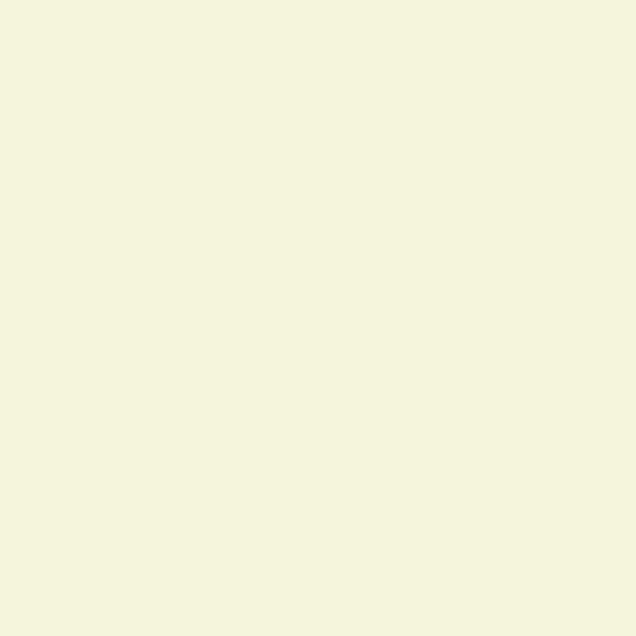

In [11]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
nodes = mcts.history_level_1_dict[4]['nodes']

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])

    grasp = mcts.tree.nodes[nodes[2*(i)+1]]['grasp_set'][0]
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)


    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [9]:
mcts.infeasible_sub_nodes

[[0,
  7,
  446,
  450,
  452,
  455,
  458,
  461,
  463,
  465,
  469,
  470,
  475,
  478,
  480,
  481,
  485,
  487,
  490,
  494,
  495,
  497,
  500,
  503,
  504]]

각 node에서 생성한 grasp을 inverse kinematics를 풀어보자 


엄청 쉬워보이는 자세인데 왜 IK 실패를 할까

In [18]:
def show_curernt_scene(q, pose):
    fig, ax = p_utils.init_3d_figure(name="Level wise 1")
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(q)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)
    
    mcts.rearr_action.scene_mngr.set_gripper_pose(pose)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [11]:
current_state_node

NameError: name 'current_state_node' is not defined

In [91]:
last_action_node['state'].objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.34645189 -0.27510566  0.87515735]),
 'can0': Object(name=can0, pos=[0.37967303 0.22550238 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[0.42014769 0.00883087 0.88526188])}

In [89]:
last_action_node

{'depth': 5,
 'state': <pytamp.scene.scene.Scene at 0x7f38d0590ac0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'ben_cube0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[ 0.45999483,  0.8879216 ,  0.        ,  0.47189415],
           [-0.8879216 ,  0.45999483,  0.        , -0.22862241],
           [ 0.        ,  0.        ,  1.        ,  0.83529998],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 2.6525641025641034,
 'value_history': [2.6525641025641034],
 'visit': 1,
 'number': 465,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'level1_5': True,
 'success': False,
 'cost': 0,
 'test': (),
 'grasp_set': array([[[-9.57802589e-01,  1.60181513e-01, -2.38654931e-01,
           5.90741910e-01],
         [ 1.76931649e-01,  9.82934117e-01, -5.03560342e-02,
          -6.25361523e-04],
         [ 2.26515987e-01, -9.04567494e-02, -9.69797992e-01,
           9.35301307e-01],
         [ 0.00000000e+00,  0.00000000e+

Current state node num :  82
Current state is came from last action
[[-0.95959836  0.1365453  -0.24602118  0.60479504]
 [ 0.15776686  0.9850888  -0.06862646  0.0046475 ]
 [ 0.2329821  -0.10466783 -0.966832    0.99195665]
 [ 0.          0.          0.          1.        ]]
rearr_obj_name :  ben_cube0
default 부터 Pre grasp까지 IK 품
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0137 sec

pre_grasp 부터 grasp까지 IK 품
solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0094 sec

grasp 부터 post_grasp까지 IK 품
solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0123 sec

default 부터 post_release까지 IK 품
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0139 sec

release 부터 post_release까지 IK 품
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0122 sec

post_release 부터 post_release까지 IK 품
solve with LM1
Iterators : 0
WorkingTime[inverse_kinematics]: 0.0032 sec



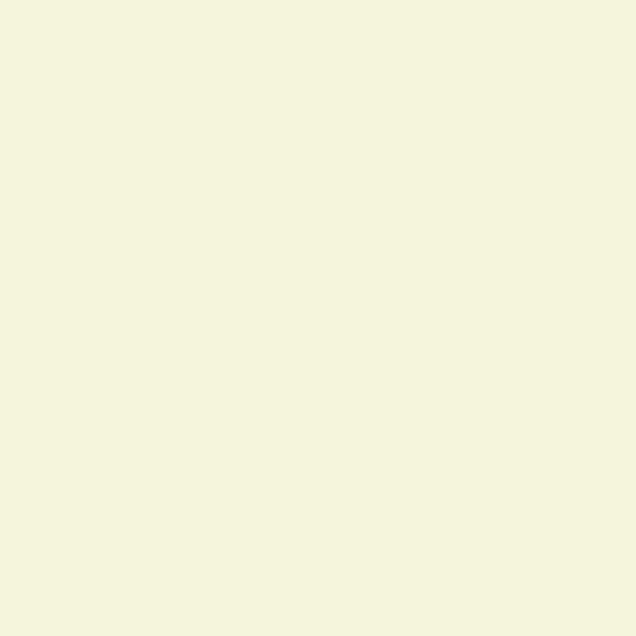

In [21]:
default_thetas = mcts.rearr_action.scene_mngr.scene.robot.init_qpos

for _, i in enumerate(nodes):
    if _ < 1:
        continue
    if _%2 == 1:
        continue
        
    print("Current state node num : ",i)
    print("Current state is came from last action")
    
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*_+1]]['state'])

    last_action_node = mcts.tree.nodes[nodes[2*_+1]]
    current_state_node = mcts.tree.nodes[i]
    
    print(current_state_node['action']['pre_grasp'])
    pre_grasp_pose = current_state_node['action']['pre_grasp']
    grasp_pose = current_state_node['action']['grasp']
    post_grasp_pose = current_state_node['action']['post_grasp']
    
    pre_release_pose = current_state_node['action']['pre_release']
    release_pose = current_state_node['action']['release']
    post_release_pose = current_state_node['action']['post_release']
    
    obj_release_pose = current_state_node['action']['table']
    # Set Scene
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)
    rearr_obj_name = current_state_node['state'].rearr_obj_name
    rearr_default_pose = current_state_node['state'].rearr_obj_default_pose
    print("rearr_obj_name : ", rearr_obj_name)
    
    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, rearr_default_pose)

    show_curernt_scene(default_thetas ,pre_grasp_pose)
    print("default 부터 Pre grasp까지 IK 품")
    
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
            default_thetas, pre_grasp_pose, max_iter=100
        )
    
    show_curernt_scene(goal_q, grasp_pose)
    print("pre_grasp 부터 grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, grasp_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_grasp_pose)
    print("grasp 부터 post_grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, post_grasp_pose, max_iter=100
    )
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)

    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, obj_release_pose)

    show_curernt_scene(default_thetas, post_release_pose)
    print("default 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        default_thetas, pre_release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, release_pose)
    print("release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_release_pose)
    print("post_release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    break

In [41]:

mcts.tree.nodes[mcts.infeasible_sub_nodes[0][2*_ + 2]]['state'].

'bottle0'